# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Datasets

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

Features (flattened images)

Labels (0-9)

In [3]:
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (1797, 64)
Target shape: (1797,)


# Visualize Images

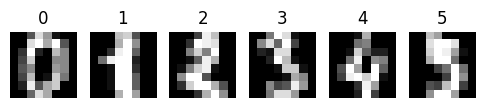

In [4]:
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(digits.target[i])
    plt.axis('off')
plt.show()


# Feature Scaling

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA with different Concept

In [6]:
components = [2, 10, 30, 50]
explained_variance = {}

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance[n] = np.sum(pca.explained_variance_ratio_)


In [7]:
for k, v in explained_variance.items():
    print(f"PCA with {k} components explains {v:.4f} variance")


PCA with 2 components explains 0.2159 variance
PCA with 10 components explains 0.5887 variance
PCA with 30 components explains 0.8932 variance
PCA with 50 components explains 0.9828 variance


# Plot Cumulative Explained Variance

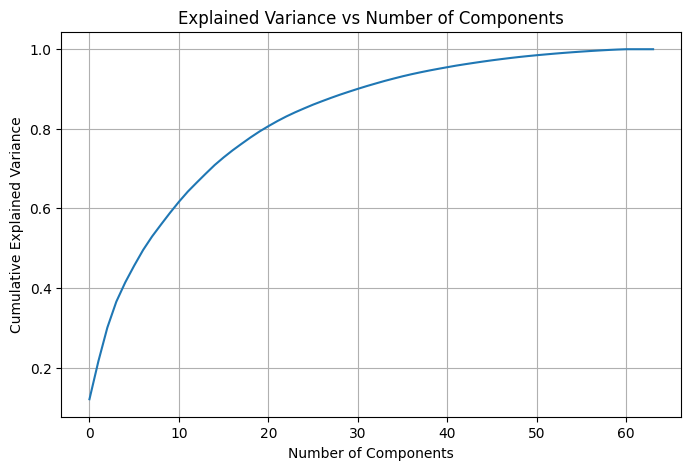

In [8]:
pca_full = PCA()
pca_full.fit(X_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid()
plt.show()


# Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


# Logistic Regression on Original Data

In [10]:
lr_original = LogisticRegression(max_iter=3000)
lr_original.fit(X_train, y_train)

y_pred_original = lr_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

print("Accuracy without PCA:", acc_original)


Accuracy without PCA: 0.9703703703703703


# Logistic Regression on PCA-Reduced data

In [11]:
pca_30 = PCA(n_components=30)

X_pca = pca_30.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)

lr_pca = LogisticRegression(max_iter=3000)
lr_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = lr_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)

print("Accuracy with PCA (30 components):", acc_pca)


Accuracy with PCA (30 components): 0.9629629629629629


# Accuracy comparison Report

In [12]:
print("----- Accuracy Comparison -----")
print(f"Original Data Accuracy : {acc_original:.4f}")
print(f"PCA Reduced Accuracy   : {acc_pca:.4f}")


----- Accuracy Comparison -----
Original Data Accuracy : 0.9704
PCA Reduced Accuracy   : 0.9630


# 2D PCA Scatter Plot

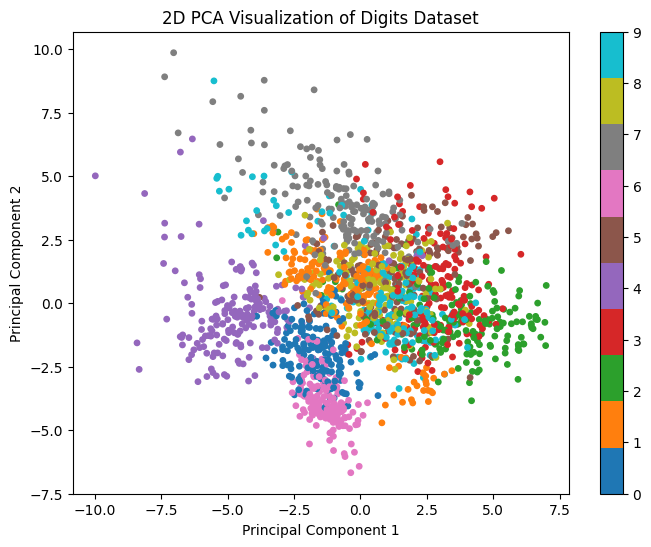

In [13]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=y, cmap='tab10', s=15)
plt.colorbar(scatter)
plt.title("2D PCA Visualization of Digits Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# CONCLUSION

PCA reduced the dimensionality of the dataset while retaining most of the variance. Using 30 components preserved high classification accuracy while significantly reducing feature size. This demonstrates the trade-off between dimensionality reduction and model performance.